In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Product_Recommendation_Data.csv")
print("First 5 Records:")
print(df.head())

First 5 Records:
   User_ID  Age Gender  Browsing_Time  Num_Purchases  Avg_Session_Time  \
0        1   23      M             12              1               5.4   
1        2   35      F             25              4               8.2   
2        3   29      F             20              3               7.1   
3        4   41      M             15              2               6.5   
4        5   27      M             18              2               7.0   

  Product_Category  Recommended  
0      Electronics            0  
1          Fashion            1  
2       Home Decor            1  
3        Groceries            0  
4      Electronics            1  


In [3]:
# Step 3: Data Preprocessing
df = df.dropna()

# Encode Categorical Columns
gender_enc = LabelEncoder()
category_enc = LabelEncoder()

df["Gender"] = gender_enc.fit_transform(df["Gender"])
df["Product_Category"] = category_enc.fit_transform(df["Product_Category"])

# Define Features and Target
X = df[["Age", "Gender", "Browsing_Time", "Num_Purchases", "Avg_Session_Time", "Product_Category"]]
y = df["Recommended"]

In [4]:
# Step 4: Scale Numeric Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.90      0.95        10

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.94      0.93      0.93        15

Accuracy: 0.9333333333333333


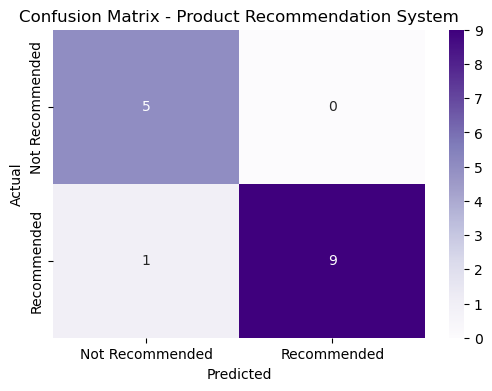

In [5]:
# Step 7: Evaluate Model
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.title("Confusion Matrix - Product Recommendation System")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

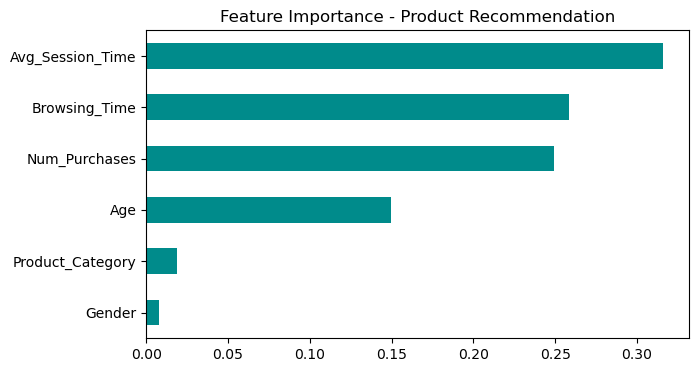

In [6]:
# Step 8: Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='darkcyan', figsize=(7,4))
plt.title("Feature Importance - Product Recommendation")
plt.show()

In [7]:
# Step 9: Predict for a New User
new_user = pd.DataFrame({
    "Age": [29],
    "Gender": [gender_enc.transform(["F"])[0]],
    "Browsing_Time": [22],
    "Num_Purchases": [3],
    "Avg_Session_Time": [7.9],
    "Product_Category": [category_enc.transform(["Home Decor"])[0]]
})

new_scaled = scaler.transform(new_user)
pred_prob = rf_model.predict_proba(new_scaled)[0][1]
pred_class = rf_model.predict(new_scaled)[0]

print(f"\nPredicted Recommendation Probability: {pred_prob*100:.2f}%")
print("Predicted Class:", "Recommended" if pred_class==1 else "Not Recommended")


Predicted Recommendation Probability: 100.00%
Predicted Class: Recommended
